**In this notebook, we'll analyze the StackOverflow Developer Survey 2020 dataset. The dataset contains responses to an annual survey conducted by StackOverflow.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
survey_df=pd.read_csv('survey_results_public.csv')

In [3]:
survey_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [4]:
survey_df.shape

(64461, 61)

In [5]:
survey_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

# Data Preprocessing & Cleaning 

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

Demographics of the survey respondents and the global programming community

Distribution of programming skills, experience, and preferences

Employment-related information, preferences, and opinions

Let's select a subset of columns with the relevant data for our analysis.

In [10]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt',
    'ConvertedComp'
]

Extract a copy of the data from these columns into a new data frame survey_df. We can continue to modify further without affecting the original data frame.

In [11]:
s_survey_df = survey_df[selected_columns].copy()

In [12]:
s_survey_df.shape

(64461, 21)

In [13]:
s_survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Most columns have the data type object, either because they contain values of different types or contain empty values (NaN). It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (64461). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis.

Only three of the columns were detected as numeric columns (Age and WorkWeekHrs), even though a few other columns have mostly numeric values. To make our analysis easier, let's convert some other columns into numeric data types while ignoring any non-numeric value. The non-numeric are converted to NaN.

In [14]:
s_survey_df['Age1stCode']=pd.to_numeric(s_survey_df.Age1stCode,errors='coerce')
s_survey_df['YearsCode']=pd.to_numeric(s_survey_df.YearsCode,errors='coerce')
s_survey_df['YearsCodePro']=pd.to_numeric(s_survey_df.YearsCodePro,errors='coerce')


In [15]:
s_survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs,ConvertedComp
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000,3.475600e+04
mean,30.834111,15.476572,12.782051,8.869667,40.782174,1.037561e+05
std,9.585392,5.114081,9.490657,7.759961,17.816383,2.268853e+05
min,1.000000,5.000000,1.000000,1.000000,1.000000,0.000000e+00
25%,24.000000,12.000000,6.000000,3.000000,40.000000,2.464800e+04
50%,29.000000,15.000000,10.000000,6.000000,40.000000,5.404900e+04
75%,35.000000,18.000000,17.000000,12.000000,44.000000,9.500000e+04
max,279.000000,85.000000,50.000000,50.000000,475.000000,2.000000e+06


There seems to be a problem with the age column, as the minimum value is 1 and the maximum is 279. This is a common issue with surveys: responses may contain invalid values due to accidental or intentional errors while responding. A simple fix would be to ignore the rows where the age is higher than 100 years or lower than 10 years as invalid survey responses. We can do this using the .drop method

The same holds for WorkWeekHrs. Let's ignore entries where the value for the column is higher than 140 hours. (~20 hours per day).

In [16]:
s_survey_df.drop(s_survey_df[s_survey_df.Age < 10].index, inplace=True)
s_survey_df.drop(s_survey_df[s_survey_df.Age > 100].index, inplace=True)

In [17]:
s_survey_df.drop(s_survey_df[s_survey_df.WorkWeekHrs > 140].index, inplace=True)

The gender column also allows for picking multiple options. We'll remove values containing more than one option to simplify our analysis.

In [18]:
s_survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [19]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

We've now cleaned up and prepared the dataset for analysis. Let's take a look at a sample of rows from the data frame.


In [20]:
s_survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,ConvertedComp
37071,India,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31044,France,32.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Another engineering discipline (such as civil,...",No,19.0,13.0,10.0,Bash/Shell/PowerShell;C#;HTML/CSS;Java;JavaScr...,...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, full-stack;Deve...",38.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Fairly important,48644.0
10650,India,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Web development or web design,Yes,14.0,15.0,10.0,HTML/CSS;JavaScript;PHP,...,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Designer;Developer, back-end;Developer, front-...",40.0,Very dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Often: 1-2 days per week or more,Critically important,0.0
48989,United States,27.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,No,22.0,5.0,5.0,HTML/CSS;Python;VBA,...,Once a year,Play games;Visit Stack Overflow;Do other work ...,Employed full-time,Data or business analyst,40.0,Slightly satisfied,Specific department or team I’d be working on;...,Occasionally: 1-2 days per quarter but less th...,Very important,72000.0
3178,United States,42.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,6.0,36.0,26.0,Java;JavaScript;Python;TypeScript,...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Designer;Developer, back-end;Developer, front-...",50.0,Slightly dissatisfied,Industry that I’d be working in;How widely use...,Sometimes: 1-2 days per month but less than we...,Very important,330000.0
36239,United States,43.0,Man,"Professional degree (JD, MD, etc.)","A health science (such as nursing, pharmacy, r...",Yes,8.0,40.0,6.0,HTML/CSS;JavaScript;Julia;Python;SQL,...,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,Academic researcher;Educator;Scientist,80.0,Slightly satisfied,Flex time or a flexible schedule;How widely us...,Often: 1-2 days per week or more,Critically important,300000.0
56066,Armenia,18.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,10.0,5.0,1.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript,...,Every few months,Play games;Call a coworker or friend;Visit Sta...,"Independent contractor, freelancer, or self-em...","Developer, back-end",25.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Often: 1-2 days per week or more,Not at all important/not necessary,3768.0
43318,Thailand,NaN,NaN,I never completed any formal education,NaN,Yes,5.0,7.0,NaN,Haskell;HTML/CSS;Java;JavaScript;Objective-C;P...,...,Once a decade,Call a coworker or friend,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN
53532,Nepal,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,20.0,6.0,4.0,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,...,Every few months,NaN,Employed full-time,"Developer, back-end;Developer, front-end;Syste...",NaN,Very satisfied,NaN,NaN,NaN,NaN
4293,United Kingdom,28.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16.0,10.0,5.0,C#;HTML/CSS;JavaScript;SQL;TypeScript,...,Once a year,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,"Developer, full-stack",40.0,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",Often: 1-2 days per week or more,Somewhat important,60752.0


# Exploratory Analysis and Visualization

In [21]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

**visualizing correlation**

<AxesSubplot:>

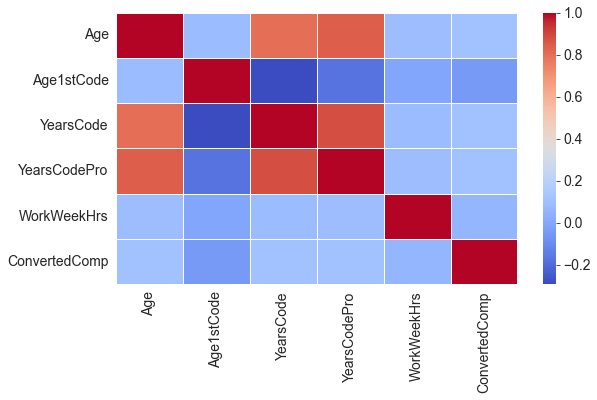

In [142]:

sns.heatmap(data=s_survey_df.corr(),linewidths=0.5,cmap='coolwarm')

In [22]:
top_countries = s_survey_df.Country.value_counts().head(15)
top_countries

United States         12468
India                  8393
United Kingdom         3894
Germany                3879
Canada                 2189
France                 1893
Brazil                 1811
Netherlands            1340
Poland                 1263
Australia              1208
Spain                  1160
Italy                  1115
Russian Federation     1091
Sweden                  884
Pakistan                808
Name: Country, dtype: int64

# Country

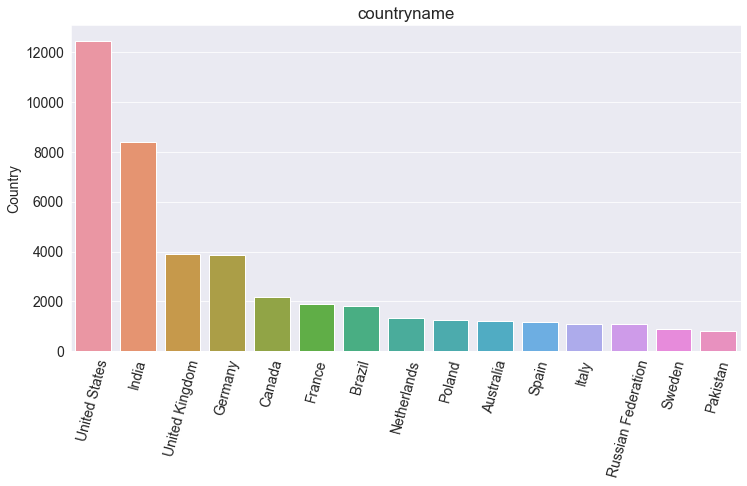

In [23]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('countryname')
sns.barplot(x=top_countries.index, y=top_countries);

It appears that a disproportionately high number of respondents are from the US and India, probably because the survey is in English, and these countries have the highest English-speaking populations. We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.

# Gender

In [24]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  46013
Woman                                                 3844
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

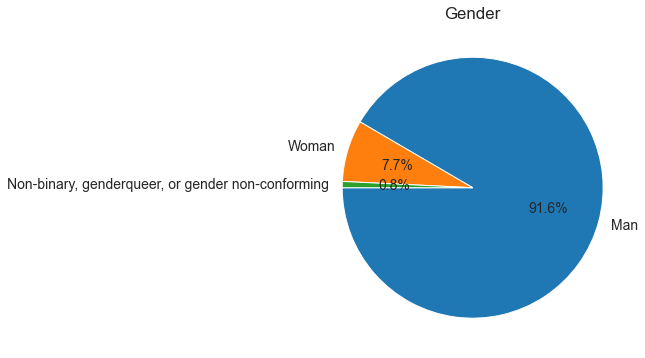

In [25]:
plt.figure(figsize=(12,6))
plt.title('Gender')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

Only about 8% of survey respondents who have answered the question identify as women or non-binary. This number is lower than the overall percentage of women & non-binary genders in the programming community - which is estimated to be around 12%.

# Educational Level

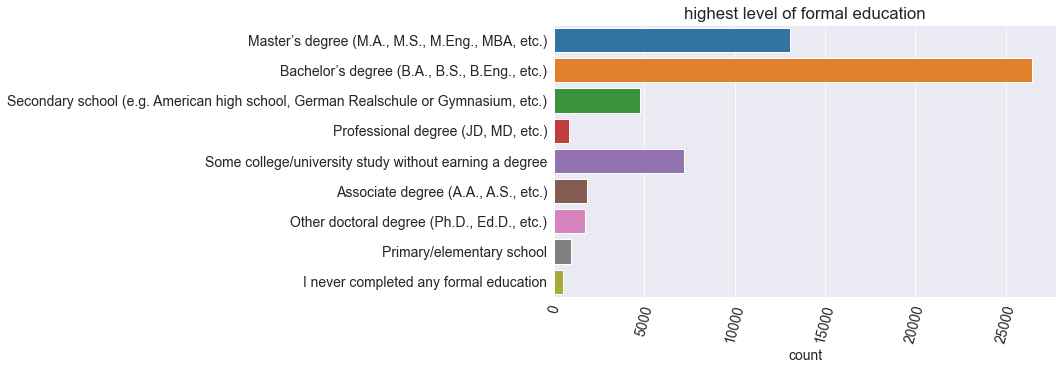

In [26]:
sns.countplot(y=s_survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title('highest level of formal education')
plt.ylabel(None);

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. However, it's not clear from this graph alone if they hold a degree in computer science.

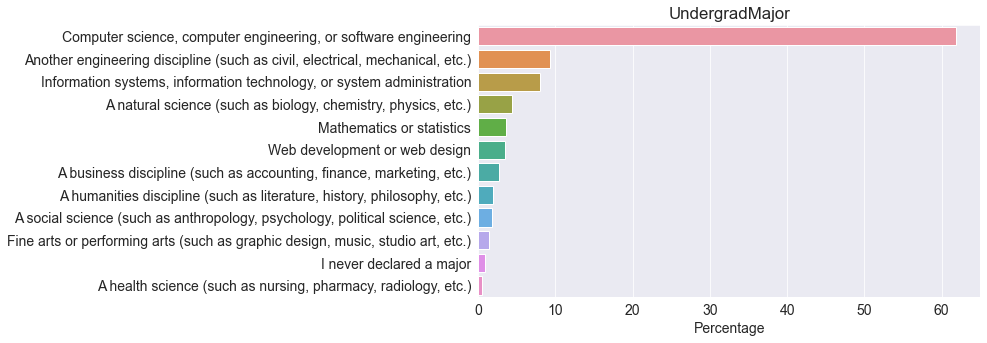

In [27]:
undergrad_pct = s_survey_df.UndergradMajor.value_counts() * 100 / s_survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title('UndergradMajor')
plt.ylabel(None);
plt.xlabel('Percentage');

It turns out that 40% of programmers holding a college degree have a field of study other than computer science - which is very encouraging. It seems to suggest that while a college education is helpful in general, you do not need to pursue a major in computer science to become a successful programmer.

# Employment

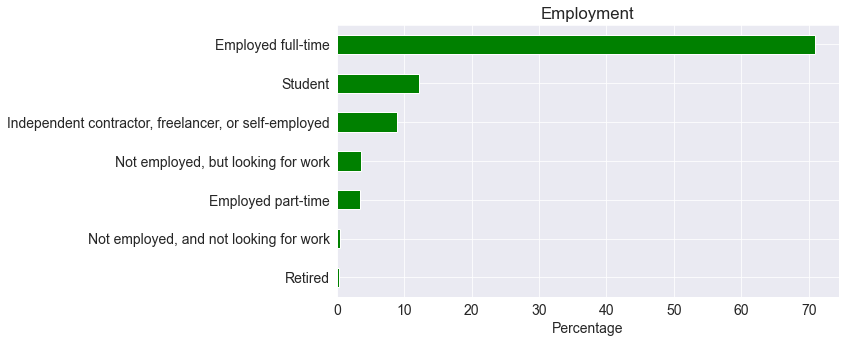

In [28]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title('Employment')
plt.xlabel('Percentage');

It appears that close to 10% of respondents are employed part time or as freelancers

In [29]:
s_survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                        4416
Developer, back-end                                                                                                                                                                                                          3073
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                               2221
Developer, back-end;Developer, full-stack                                                                                                                                                                                    1473
Developer, front-end                                                                            

The DevType field contains information about the roles held by respondents. Since the question allows multiple answers, the column contains lists of values separated by a semi-colon ;, making it a bit harder to analyze directly.

Let's define a helper function that turns a column containing lists of values (like survey_df.DevType) into a data frame with one column for each possible option.

In [30]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [31]:
dev_type_df = split_multicolumn(s_survey_df.DevType)

In [32]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The dev_type_df has one column for each option that can be selected as a response. If a respondent has chosen an option, the corresponding column's value is True. Otherwise, it is False.

We can now use the column-wise totals to identify the most common roles.

In [33]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              27137
Developer, full-stack                            27046
Developer, front-end                             18230
Developer, desktop or enterprise applications    11742
Developer, mobile                                 9447
DevOps specialist                                 5949
Database administrator                            5697
Designer                                          5307
System administrator                              5221
Developer, embedded applications or devices       4729
Data or business analyst                          4008
Data scientist or machine learning specialist     3974
Developer, QA or test                             3926
Engineer, data                                    3729
Academic researcher                               3534
Educator                                          2916
Developer, game or graphics                       2778
Engineering manager                               2714
Product ma

As one might expect, the most common roles include "Developer" in the name.


Let's visualize the relationship between working hours and compensation for two countries: US & India. We can do this using a scatter plot.

In [36]:
usa_df = s_survey_df[s_survey_df.Country.isin(['United States', 'India'])]

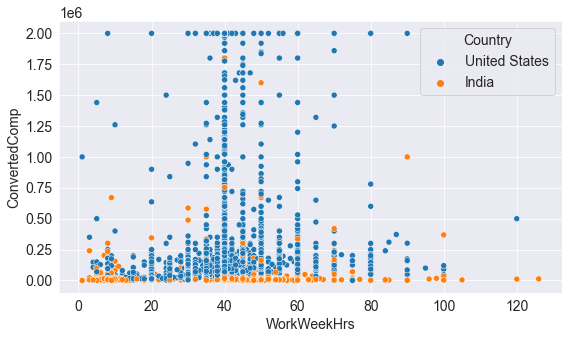

In [37]:
sns.scatterplot( x=usa_df['WorkWeekHrs'], y=usa_df['ConvertedComp'], hue=usa_df['Country'])
plt.show()

Text(0.5, 1.0, 'Hours of Work Per Week')

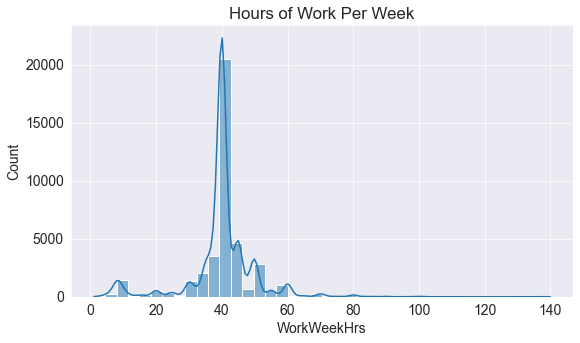

In [41]:
sns.histplot(data = s_survey_df,x='WorkWeekHrs',bins=40,kde=True)
plt.title('Hours of Work Per Week')
          

**The most popular programming languages in 2020**

In [42]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64461, dtype: object

First, we'll split this column into a data frame containing a column of each language listed in the options

In [43]:
languages_worked_df = split_multicolumn(s_survey_df.LanguageWorkedWith)
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It appears that a total of 25 languages were included among the options. Let's aggregate these to identify the percentage of respondents who selected each language.

In [44]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript               60.222996
HTML/CSS                 56.123845
SQL                      48.717072
Python                   39.243616
Java                     35.789817
Bash/Shell/PowerShell    29.445153
C#                       27.974062
PHP                      23.266880
TypeScript               22.596647
C++                      21.263957
C                        19.371443
Go                        7.815756
Kotlin                    6.930924
Ruby                      6.279352
Assembly                  5.504930
VBA                       5.422511
Swift                     5.268560
R                         5.097503
Rust                      4.548565
Objective-C               3.626411
Dart                      3.534662
Scala                     3.176997
Perl                      2.782011
Haskell                   1.894069
Julia                     0.800858
dtype: float64

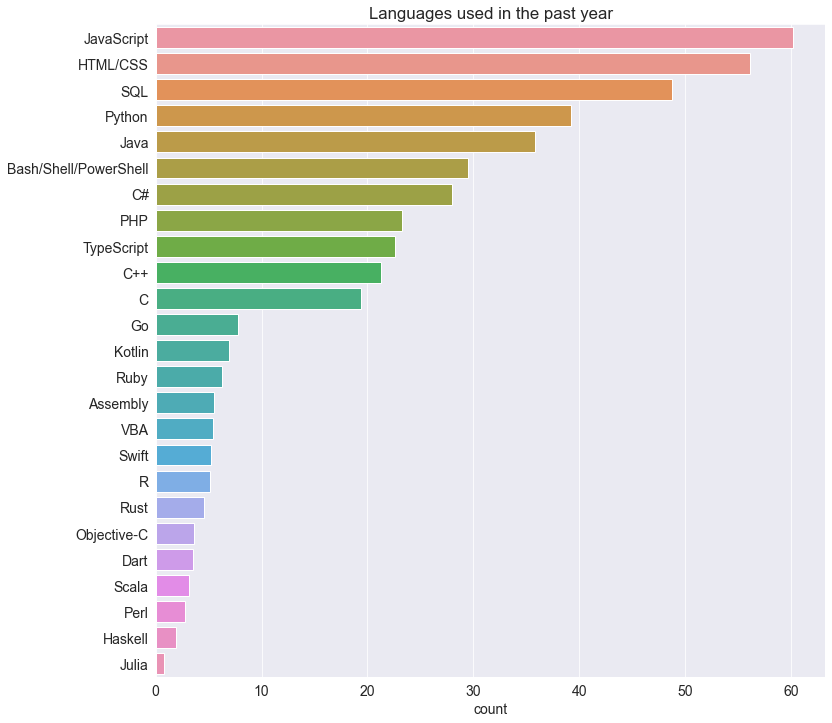

In [45]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the past year");
plt.xlabel('count');

Perhaps unsurprisingly, Javascript & HTML/CSS comes out at the top as web development is one of today's most sought skills. It also happens to be one of the easiest to get started. SQL is necessary for working with relational databases, so it's no surprise that most programmers work with SQL regularly. Python seems to be the popular choice for other forms of development, beating out Java, which was the industry standard for server & application development for over two decades.


**languages that  most people interested to learn over the next year are:**

In [46]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

Python                   41.133398
JavaScript               40.412032
HTML/CSS                 32.039528
SQL                      30.795365
TypeScript               26.462512
C#                       21.073207
Java                     20.466639
Go                       19.438110
Bash/Shell/PowerShell    18.066738
Rust                     16.254790
C++                      15.016832
Kotlin                   14.770171
PHP                      10.949256
C                         9.365353
Swift                     8.696731
Dart                      7.309846
R                         6.568313
Ruby                      6.422488
Scala                     5.331906
Haskell                   4.591924
Assembly                  3.772824
Julia                     2.544174
Objective-C               2.340950
Perl                      1.762306
VBA                       1.613379
dtype: float64

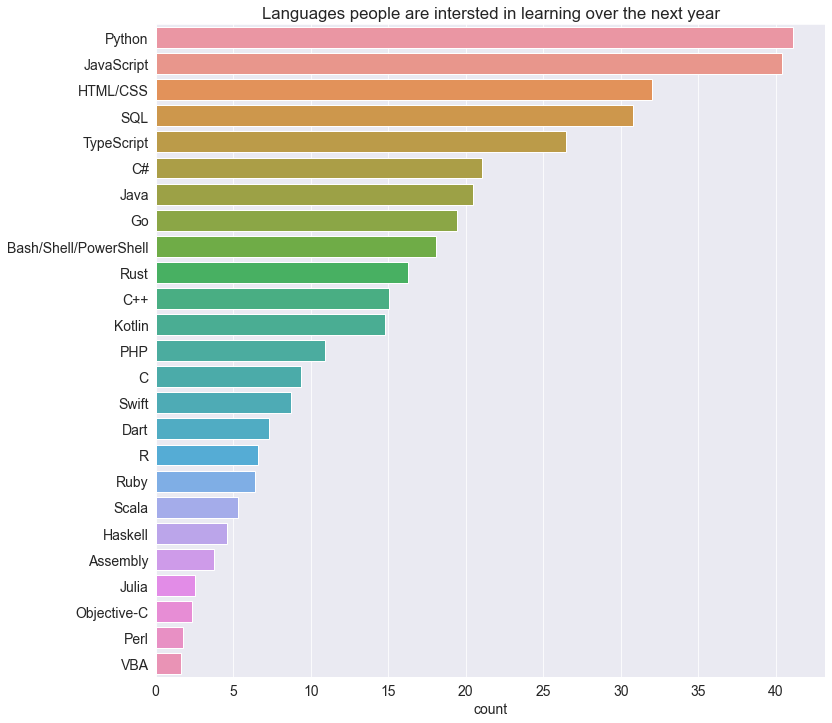

In [47]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

Once again, it's not surprising that Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for a variety of domains: application development, numerical computing, data analysis, machine learning, big data, cloud automation, web scraping, scripting, etc. We're using Python for this very analysis, so we're in good company!

 **the most loved languages, i.e., a high percentage of people who have used the language want to continue learning & using it over the next year are:**

In [48]:
languages_loved_df = languages_worked_df & languages_interested_df
languages_loved_percentages = (languages_loved_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)

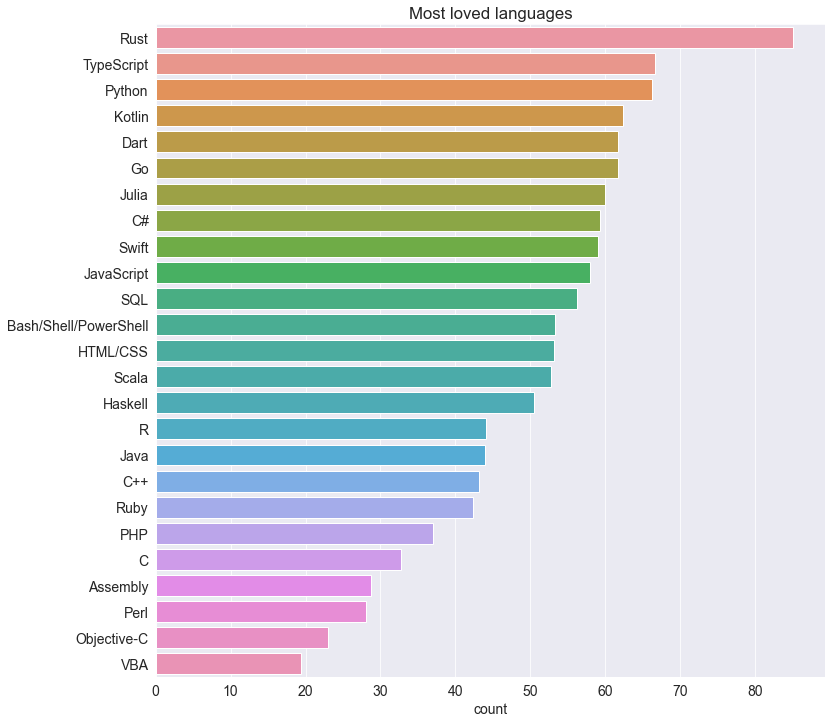

In [49]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index)
plt.title("Most loved languages");
plt.xlabel('count');


Rust has been StackOverflow's most-loved language for four years in a row. The second most-loved language is TypeScript, a popular alternative to JavaScript for web development.

Python features at number 3, despite already being one of the most widely-used languages in the world. Python has a solid foundation, is easy to learn & use, has a large ecosystem of domain-specific libraries, and a massive worldwide community.

**The countries that developers work the highest number of hours per week**

In [50]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)

In [51]:
high_response_countries_df = countries_df.loc[s_survey_df.Country.value_counts() > 250].head(15)
high_response_countries_df


,WorkWeekHrs
Country,
Norway,55.451557
Finland,52.820577
Iran,46.140065
Israel,44.744731
Turkey,43.794248
Austria,43.185372
China,42.150000
Hungary,41.926966
Greece,41.823643


The Asian countries like Iran, China, and Israel have the highest working hours, followed by the United States. However, there isn't too much variation overall, and the average working hours seem to be around 40 hours per week.

**Is important  it to start young to build a career in programming**

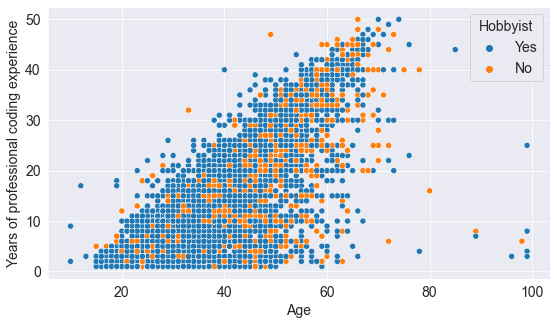

In [52]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=s_survey_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

You can see points all over the graph, which indicates that you can start programming professionally at any age. Many people who have been coding for several decades professionally also seem to enjoy it as a hobby.

We can also view the distribution of the Age1stCode column to see when the respondents tried programming for the first time.

<AxesSubplot:title={'center':'Age that Programmers started coding'}, xlabel='Age1stCode', ylabel='Count'>

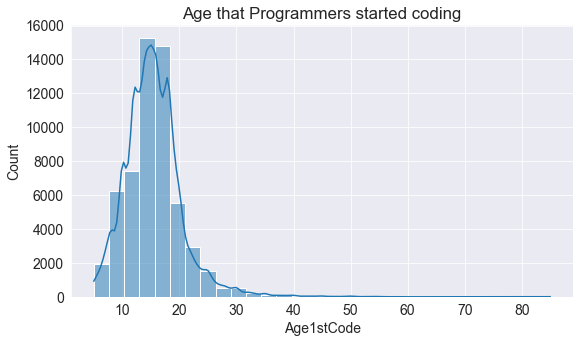

In [130]:
plt.title('Age that Programmers started coding')
sns.histplot(x=s_survey_df.Age1stCode, bins=30, kde=True)

As you might expect, most people seem to have had some exposure to programming before the age of 40. However, but there are people of all ages and walks of life learning to code.

# z_test

In [82]:
s_survey_df['Age1stCode'].value_counts()

15.0    5595
14.0    5498
16.0    5453
18.0    5369
12.0    5074
        ... 
68.0       1
76.0       1
72.0       1
83.0       1
63.0       1
Name: Age1stCode, Length: 61, dtype: int64

In [86]:
child=s_survey_df[s_survey_df.Age1stCode < 14]
adult=s_survey_df[s_survey_df.Age1stCode > 14]


In [96]:
category=pd.cut(s_survey_df.Age1stCode,bins=[0,14,99],labels=['child','adult'])
s_survey_df.insert(3,'Age Group',category)

In [62]:
prop_child_samp=(child.Age1stCode.sum()/s_survey_df.Age1stCode.sum()).mean()
prop_child_samp

0.23818391276216327

In [63]:
age_col=s_survey_df.Age1stCode
age_col

0        13.0
1        19.0
2        15.0
3        18.0
4        16.0
         ... 
64456    16.0
64457     NaN
64458     NaN
64459     NaN
64460     NaN
Name: Age1stCode, Length: 64306, dtype: float64

In [65]:
prop_child_hyp=0.35

In [84]:
boot_first_code=[]
for i in range(5000):
    boot_first_code.append(np.mean(age_col.sample(frac=1,replace=True)))

In [74]:
lower=np.quantile(boot_first_code,0.025)
upper=np.quantile(boot_first_code,0.975)
print(lower,upper)

15.43239523220875 15.517662685597696


In [75]:
#alpha
significance_level=0.05

**Hypothesis**:
Ho=The programmers started programming as children is lessthan 35%...


Ha=The programmers started programming as children is greaterthan 35%...

This is a right tailed test.
Calculate p_values



In [76]:
std_error=np.std(boot_first_code,ddof=1)
std_error

0.021510773666192428

In [81]:
z_score=(prop_child_samp)-(prop_child_hyp)/std_error


In [79]:
from scipy.stats import norm
p_value=1-norm.cdf(z_score,loc=0,scale=1)
p_value

1.0

since p_value>alpha 
we failed to reject Ho
so Ho is true.i.e.,**The programmers started programming as children is lessthan 35% is True**

# test statistic:t_test

**Hypothesis**:
Ho=The mean compensation is same as those that coded 1st as a child and those that coded 1st as adult...


*Ha=The mean compensation is greater than those that coded 1st as a child and those that coded 1st as adult*...

Perform Right tailed test

In [108]:
x_bar=s_survey_df.groupby('Age Group')['ConvertedComp'].mean()
x_bar

Age Group
child    117073.472725
adult     91779.758028
Name: ConvertedComp, dtype: float64

In [112]:
s=s_survey_df.groupby('Age Group')['ConvertedComp'].std()
s

Age Group
child    231703.558987
adult    221356.249881
Name: ConvertedComp, dtype: float64

In [105]:
n=s_survey_df.groupby('Age Group')['ConvertedComp'].count()
n

Age Group
child    16022
adult    18341
Name: ConvertedComp, dtype: int64

In [113]:
numerator=x_bar['child']-x_bar['adult']

In [120]:
denominator=np.sqrt(((s['child']**2)/n['child'])+((s['adult']**2)/n['adult']))

In [122]:
t_stat=numerator/denominator


In [123]:
degrees_of_freedom=n['child']+n['adult']-2

In [126]:
from scipy.stats import t
p_value=1-t.cdf(t_stat,df=degrees_of_freedom)
p_value

0.0

here p_value <alpha ,so reject Ho .
**Evidence that stack overflow programmers who started coding as a child earn more**

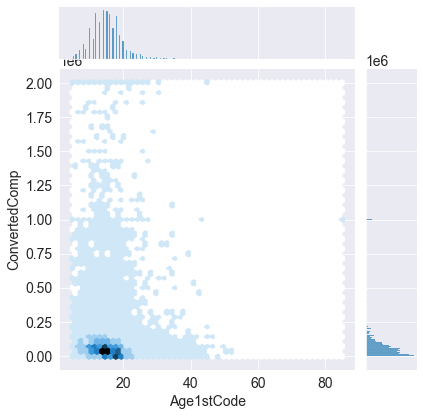

In [137]:
plot_for_AgeGroup_and_Hobbiest = sns.jointplot(x = s_survey_df["Age1stCode"], y = s_survey_df["ConvertedComp"], kind = 'hex',bins=10)


This plot also tells us that stack overflow programmers who started coding as a child earn more